In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1=pd.read_csv(r'C:\Users\sayeh omar\Desktop\Data analysis studying\Tunisia Covid 19\Coronavirus_Tunisia_Updated.csv')


In [3]:
df1.head(8)

,case,confirmation_date,age,gender,city,symptomatic,return_from,country
0,89,2020-03-22,46.0,Masculin,Mednine,2020-03-14,Local,Tunisia
1,88,2020-03-22,63.0,Féminin,Mednine,2020-03-14,Local,Tunisia
2,87,2020-03-22,40.0,Masculin,Tunis,2020-03-19,Local,Tunisia
3,86,2020-03-22,57.0,Féminin,Ariana,2020-03-21,Local,Tunisia
4,85,2020-03-22,61.0,Masculin,Manouba,2020-03-16,France,Tunisia
5,84,2020-03-22,NaN,Féminin,Tunis,2020-03-14,Local,Tunisia
6,83,2020-03-22,69.0,Féminin,Tunis,2020-03-20,France,Tunisia
7,82,2020-03-22,61.0,Féminin,Tunis,2020-03-16,Espagne,Tunisia


In [4]:
df1.columns

Index(['case', 'confirmation_date', 'age', 'gender', 'city', 'symptomatic',
       'return_from', 'country'],
      dtype='object')

In [5]:
df1.dtypes

case                   int64
confirmation_date     object
age                  float64
gender                object
city                  object
symptomatic           object
return_from           object
country               object
dtype: object

In [6]:
df1['confirmation_date']=pd.to_datetime (df1['confirmation_date'] , format='%Y-%m-%d')

In [7]:
df1['city'].value_counts()


city
Tunis        28
Ariana       17
Ben Arous     8
Mednine       5
Monastir      5
Tataouine     5
Sousse        5
Sfax          4
Mahdia        3
Kairouan      2
Bizerte       2
Manouba       1
Kebili        1
Gabes         1
Nabeul        1
Gafsa         1
Name: count, dtype: int64

In [8]:
df1['return_from'].value_counts()

return_from
France        35
Local         29
Turquie        6
Espagne        5
Italie         4
Egypte         4
Angleterre     3
Etats Unis     1
Vietnam        1
Allemagne      1
Name: count, dtype: int64

In [9]:
df2=pd.read_csv(r'C:\Users\sayeh omar\Desktop\Data analysis studying\Tunisia Covid 19\Tunisia_daily_number_of_cases.csv')

In [10]:
print(df2.dtypes)

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                     int64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object


In [11]:
df2['dateRep']=pd.to_datetime(df2['dateRep'], format='%d/%m/%Y')

In [12]:
print(df2.dtypes)


dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                            int64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object


In [13]:
array1=[]
array2=[]

for i in range(len(df1['city'])):
    if df1['city'].iloc[i] not in array1:
        array1.append(df1['city'].iloc[i])
       
array1 =np.array(array1)
array2 = df1['city'].value_counts()

df3 = pd.DataFrame({'City': array2.index, 'Count': array2.values})




Visualising the data 

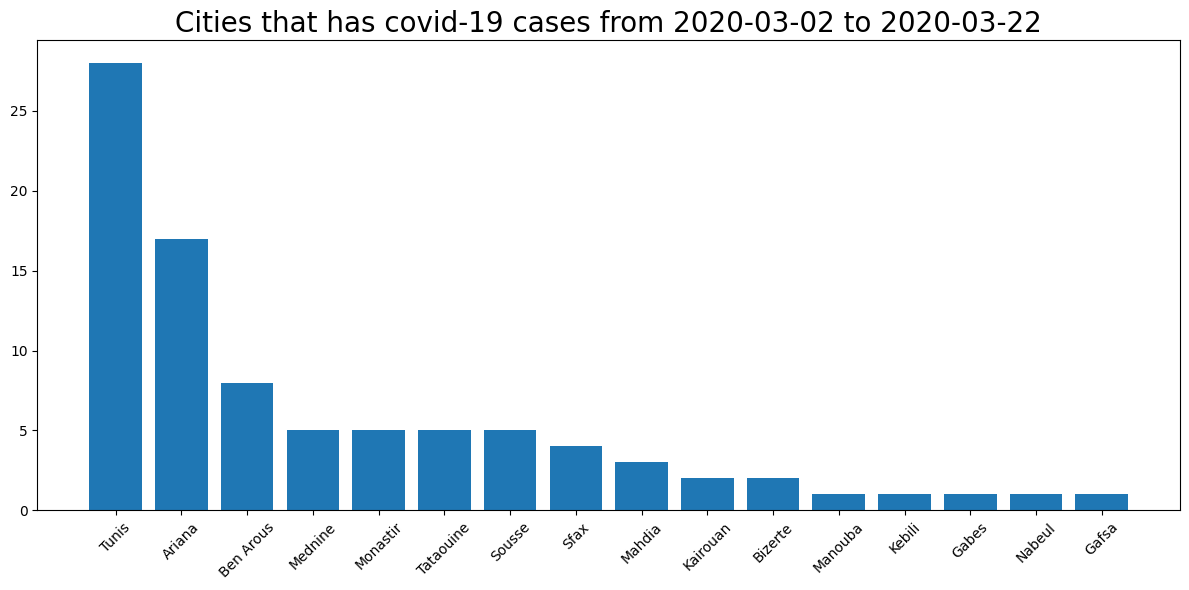

In [14]:
#Cities that has covid-19 cases
fig2=plt.figure(figsize=(12,6))
plt.title('Cities that has covid-19 cases from 2020-03-02 to 2020-03-22', size =20  )
plt.bar(df3['City'],df3['Count'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



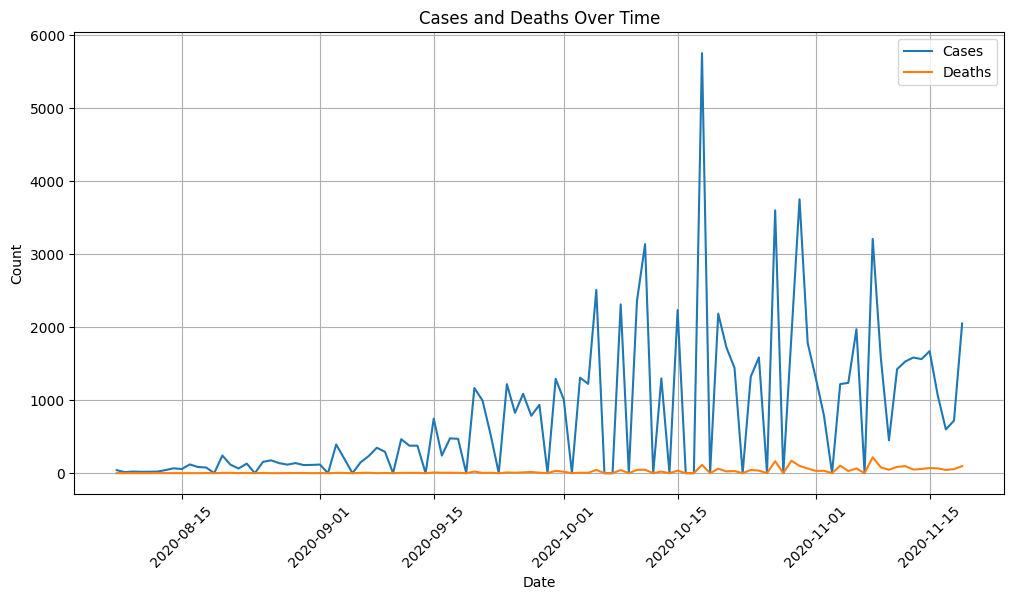

In [15]:
#grouth trend 

start_date = '2020-08-07'
end_date = '2020-12-30'

filtredDF=df2[(df2['dateRep'] >= start_date) & (df2['dateRep'] <= end_date)]


fig2 =plt.figure(figsize=(12,6))

sns.lineplot(x='dateRep', y='cases', data=filtredDF, label='Cases')
sns.lineplot(x='dateRep', y='deaths', data=filtredDF, label='Deaths')
plt.title('cases/deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Cases and Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()